In [89]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import sympy

拓展：switches are treated as double-direction edges


In [85]:
incidence_matrix_o = sp.coo_matrix(([-1],([0],[0])), shape=(9,1)).toarray()
incidence_matrix_b = sp.coo_matrix(([1,1,1,-1,-1,-1],([2,3,4,5,6,7],[0,1,2,0,1,2])), shape=(9,3)).toarray()
incidence_matrix_s = sp.coo_matrix((
    [
        1,
        -1,1,1,1,
        -1,1,
        -1,1,
        -1,
        1,
        -1,1,
        -1,1,
        -1,-1,-1,1
    ],
    (
        # [1,2,2,2,2,3,3,4,4,5,6,7,7,8,8,9,9,9,9],
        # [1,1,2,3,4,2,5,3,6,4,7,5,8,6,9,7,8,9,10]
        [0,1,1,1,1,2,2,3,3,4,5,6,6,7,7,8,8,8,8],
        [0,0,1,2,3,1,4,2,5,3,6,4,7,5,8,6,7,8,9]
    )
    ), shape=(9,10)).toarray()
#  关联矩阵，降阶，补全
incidence_matrix_total = np.hstack((incidence_matrix_o, incidence_matrix_b, incidence_matrix_s, -incidence_matrix_s))
print(incidence_matrix_total)

[[-1  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  1  1  1  0  0  0  0  0  0  1 -1 -1 -1  0  0  0  0  0  0]
 [ 0  1  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0  0  0  0]
 [ 0  0  1  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0  0  0]
 [ 0  0  0  1  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0 -1  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0]
 [ 0  0  0 -1  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1 -1  1  0  0  0  0  0  0  1  1  1 -1]]


In [42]:
# 补全关联矩阵
fix_matrix = sp.coo_matrix(([1,-1,1],([0,0,0],[0,13,23])),shape=(1,24)).toarray()
fix_incidence_matrix_total = np.vstack((incidence_matrix_total, fix_matrix))
print(fix_incidence_matrix_total)

[[-1  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  1  1  1  0  0  0  0  0  0  1 -1 -1 -1  0  0  0  0  0  0]
 [ 0  1  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0  0  0  0]
 [ 0  0  1  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0  0  0]
 [ 0  0  0  1  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0 -1  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0  0]
 [ 0  0  0 -1  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1 -1  1  0  0  0  0  0  0  1  1  1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1]]


In [43]:
# 根据关联矩阵计算邻接矩阵
n = fix_incidence_matrix_total.shape[0]
adj_matrix_new = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        for k in range(fix_incidence_matrix_total.shape[1]):
            if fix_incidence_matrix_total[i, k] == 1 and fix_incidence_matrix_total[j, k] == -1:
                adj_matrix_new[i, j] = 1

print(adj_matrix_new)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [44]:
# 权值邻接矩阵
d = adj_matrix_new-adj_matrix_new.transpose()
additional_weight = np.where(d == 1, incidence_matrix_s.shape[1]-1, 0)
adj_matrix_weight = adj_matrix_new + additional_weight
print(adj_matrix_weight)

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0. 10.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0. 10.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0. 10.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  0.  1.]
 [10.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


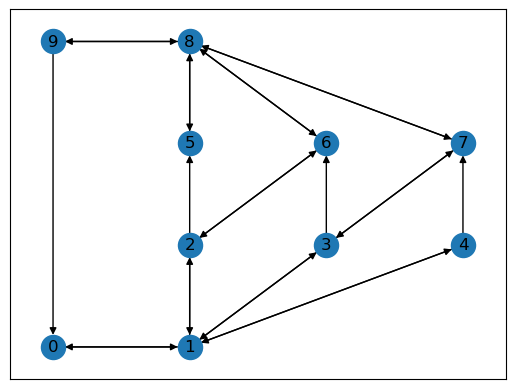

In [45]:
# 权值有向图
G = nx.DiGraph(adj_matrix_weight)

# 绘制
# nx.draw_networkx(G, with_labels=True, font_weight='bold')
pos = {
    0: (0,0),
    1: (1,0),
    2: (1,1),
    3: (2,1),
    4: (3,1),
    5: (1,2),
    6: (2,2),
    7: (3,2),
    8: (1,3),
    9: (0,3)
}
nx.draw_networkx(G, pos)

In [56]:
# 定义起点、终点和必须经过的边
node_start = 0
node_end = 9
edge_pass = (2, 5)
    
# 首先找到从源节点到边起点的路径，和从边终点到目标节点的路径
path1 = nx.dijkstra_path(G, node_start, edge_pass[0], weight='weight')
path2 = nx.dijkstra_path(G, edge_pass[1], node_end, weight='weight')

print(path1)

# 如果这两条路径都存在，那么就可以沿着其中的路径组合出完整的路径
if path1 is not None and path2 is not None:
    if G.get_edge_data(edge_pass[0],edge_pass[1])['weight'] != 0.:
        total_path = path1 + path2
        total_weight = 0
        for i in range(len(total_path)-1):
            source = total_path[i]
            target = total_path[i+1]
            total_weight += G.get_edge_data(source, target)['weight']
        print(f"SP from {node_start} to {node_end} passed {edge_pass} is {total_path} with weight {total_weight}")
    else:
        print(f"no SP from {node_start} to {node_end} passed {edge_pass}")
else:
    print(f"no SP from {node_start} to {node_end} passed {edge_pass}")

[0, 1, 2]
SP from 0 to 9 passed (2, 5) is [0, 1, 2, 5, 8, 9] with weight 14.0


In [64]:
def find_SP(G, edge_pass, node_start=list(G.nodes)[0], node_end=list(G.nodes)[-1]):
    """
    :param G: direct-graph with weight
    :param edge_pass: the edge which the SP contains, like (2,5)
    :param node_start: SP's start node, default the first node in G.nodes
    :param node_end: SP's end node, default the last node in G.nodes

    :return total_path, total_weight | None: SP as a list of nodes and its total weight; or None if not find
    """
    # find the path from the source node to the edge start point, and the path from the edge end point to the target node
    path1 = nx.dijkstra_path(G, node_start, edge_pass[0], weight='weight')
    path2 = nx.dijkstra_path(G, edge_pass[1], node_end, weight='weight')

    # Stitch these two paths, if they exist
    if path1 is not None and path2 is not None:
        if G.get_edge_data(edge_pass[0],edge_pass[1])['weight'] != 0.:
            total_path = path1 + path2
            total_weight = 0
            for i in range(len(total_path)-1):
                source = total_path[i]
                target = total_path[i+1]
                total_weight += G.get_edge_data(source, target)['weight']
            return total_path, total_weight
        else:
            return None
    else:
        return None

In [66]:
find_SP(G,(3,6))

([0, 1, 3, 6, 8, 9], 14.0)

In [92]:
import numpy as np
from scipy.sparse import coo_matrix
from sympy import symbols, simplify

# Define the matrices Ao, Ab, and As
# Ao = coo_matrix(([1], ([0], [0])), shape=(8, 1))
# Ab = coo_matrix(([1, 1, -1, -1, 1, -1], ([2, 3, 4, 5, 5, 6], [0, 1, 0, 1, 2, 2])), shape=(8, 3))
# As = coo_matrix(([1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1], ([0, 1, 1, 1, 2, 3, 4, 6, 7, 7, 7], [0, 0, 1, 2, 1, 2, 3, 4, 3, 4, 5])), shape=(8, 6))
Ao = incidence_matrix_o
Ab = incidence_matrix_b
As = incidence_matrix_s

# Combine Ao, Ab, and As to form the matrix A
# A = np.hstack((Ao.toarray(), Ab.toarray(), As.toarray()))

A = np.hstack((Ao, Ab, As))

# Define the symbolic variables
Ro = symbols('Ro', positive=True)
rb = symbols('rb', positive=True)
rs = symbols('rs', positive=True)
ub = symbols('ub', positive=True)

# Define the switch states and voltages
switch_state = [1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
x = np.diag(switch_state)
Us = np.array([0]+[-ub, -ub, -ub] +[0]*As.shape[1]).reshape(-1, 1)
Ub = np.array([-ub, -ub, -ub]).reshape(-1, 1)

# Define the admittance matrices Yo, Yb, and Ys
Yo = np.diag([1/Ro])
Yb = np.diag([1/rb]*Ab.shape[1])
Ys = np.diag([1/rs]*As.shape[1]) @ x

# Combine Yo, Yb, and Ys to form the admittance matrix Y
Y = np.diag([1/Ro] + [1/rb]*3 + list(np.array(switch_state)/rs))

# Compute the nodal admittance matrix Yn and the nodal current vector Isn
Yn = A @ Y @ A.T
Isn = A @ Y @ Us

# Solve for the nodal voltage vector Un
Yn_Matrix = sympy.Matrix(Yn)
Yn_inv_Matrix = Yn_Matrix.inv()
Yn_inv = np.array(Yn_inv_Matrix.tolist())
Un = Yn_inv @ Isn

# Compute the branch voltage vector U and the branch current vector I
U = A.T @ Un
I = Y @ U - Y @ Us

# Simplify the expressions for Io and Ib
Io = simplify(I[0])
Ib = simplify(I[1:4])

# Compute the ideal values of Io and Ib when rs = 0
Io_ideal = simplify(Io.subs(rs, 0))
Ib_ideal = simplify(Ib.subs(rs, 0))

KeyboardInterrupt: 